In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(context="notebook", style="darkgrid")


# Introduction to Unsupervised Learning

## The KMeans Algorithm

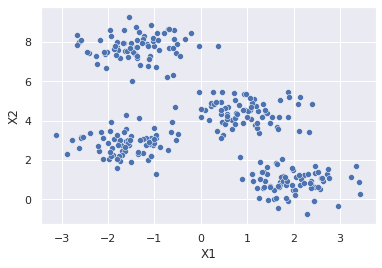

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

tb_blob = pd.DataFrame(X)
tb_blob.columns = ["X1", "X2"]
sns.scatterplot(data=tb_blob, x="X1", y="X2")


### Creating Initial Positions

In [3]:
p1 = (np.quantile(tb_blob["X1"], 0.25), np.quantile(tb_blob["X2"], 0.25))
p2 = (np.quantile(tb_blob["X1"], 0.25), np.quantile(tb_blob["X2"], 0.75))
p3 = (np.quantile(tb_blob["X1"], 0.75), np.quantile(tb_blob["X2"], 0.25))
p4 = (np.quantile(tb_blob["X1"], 0.75), np.quantile(tb_blob["X2"], 0.75))

tb_centroids = pd.DataFrame(
    [p1, p2, p3, p4], columns=["X1", "X2"], index=["p1", "p2", "p3", "p4"]
)
tb_centroids


,X1,X2
p1,-1.498837,1.916025
p2,-1.498837,5.607633
p3,1.433350,1.916025
p4,1.433350,5.607633


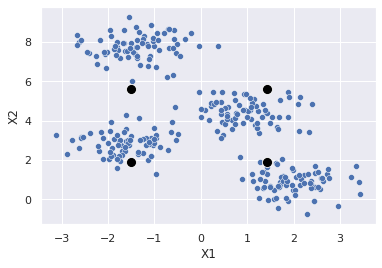

In [4]:
sns.scatterplot(data=tb_blob, x="X1", y="X2")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)


### Updating Positions - Step 1

#### I - Calculate Cluster Assignments

In [5]:
for centroid in tb_centroids.iterrows():
    centroid_name = centroid[0]
    centroid_x1 = centroid[1]["X1"]
    centroid_x2 = centroid[1]["X2"]
    tb_blob[centroid_name] = (tb_blob["X1"] - centroid_x1) ** 2 + (tb_blob["X2"] - centroid_x2) ** 2

tb_blob.head()

,X1,X2,p1,p2,p3,p4
0,0.836857,2.136359,5.504011,17.505205,0.404351,12.405544
1,-1.413658,7.409623,30.186872,3.254424,38.285072,11.352624
2,1.155213,5.099619,17.179247,7.302058,10.212627,0.335439
3,-1.018616,7.814915,35.027506,5.102704,40.809033,10.884231
4,1.271351,1.892542,7.674494,21.475843,0.026795,13.828144


In [6]:
tb_blob[["p1", "p2", "p3", "p4"]].idxmin(1)

0      p3
1      p2
2      p4
3      p2
4      p3
       ..
295    p3
296    p3
297    p4
298    p4
299    p1
Length: 300, dtype: object

In [7]:
tb_blob["cluster"] = tb_blob[["p1", "p2", "p3", "p4"]].idxmin(1)
tb_blob.head()

,X1,X2,p1,p2,p3,p4,cluster
0,0.836857,2.136359,5.504011,17.505205,0.404351,12.405544,p3
1,-1.413658,7.409623,30.186872,3.254424,38.285072,11.352624,p2
2,1.155213,5.099619,17.179247,7.302058,10.212627,0.335439,p4
3,-1.018616,7.814915,35.027506,5.102704,40.809033,10.884231,p2
4,1.271351,1.892542,7.674494,21.475843,0.026795,13.828144,p3


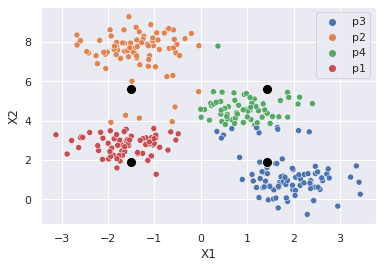

In [8]:
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)


#### II - Recalculate Centroids

In [9]:
tb_centroids = tb_blob.groupby("cluster")[["X1", "X2"]].mean()
tb_centroids


,X1,X2
cluster,,
p1,-1.596219,2.761201
p2,-1.368288,7.502143
p3,1.884543,1.201490
p4,0.933740,4.615895


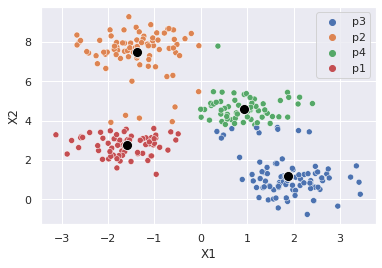

In [10]:
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)


### Updating Positions - Step 2

#### I - Calculate Cluster Assignments

In [11]:
for centroid in tb_centroids.iterrows():
    centroid_name = centroid[0]
    centroid_x1 = centroid[1]["X1"]
    centroid_x2 = centroid[1]["X2"]
    tb_blob[centroid_name] = (tb_blob["X1"] - centroid_x1) ** 2 + (
        tb_blob["X2"] - centroid_x2
    ) ** 2
tb_blob["cluster"] = tb_blob[["p1", "p2", "p3", "p4"]].idxmin(1)
tb_blob.head()


,X1,X2,p1,p2,p3,p4,cluster
0,0.836857,2.136359,6.310286,33.654299,1.971627,6.157485,p3
1,-1.413658,7.409623,21.641157,0.010618,49.419049,13.315194,p2
2,1.155213,5.099619,13.038577,12.140181,15.727330,0.283039,p4
3,-1.018616,7.814915,25.873646,0.220097,52.165719,14.045420,p2
4,1.271351,1.892542,8.977530,38.435320,0.853557,7.530634,p3


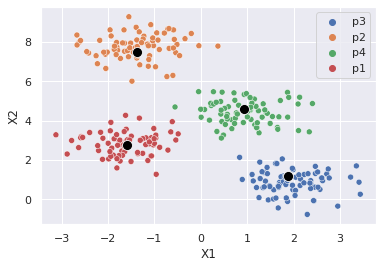

In [12]:
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)


#### II - Recalculate Centroids

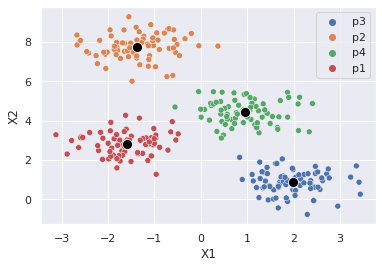

In [13]:
tb_centroids = tb_blob.groupby("cluster")[["X1", "X2"]].mean()
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)


# Using SKLEARN KMeans

In [14]:
from sklearn.cluster import KMeans


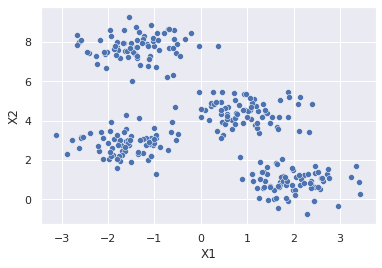

In [15]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

tb_blob = pd.DataFrame(X)
tb_blob.columns = ["X1", "X2"]
sns.scatterplot(data=tb_blob, x="X1", y="X2")


In [17]:
km_fit = KMeans(n_clusters=4)
km_fit.fit(tb_blob[["X1", "X2"]])


KMeans(n_clusters=4)

In [18]:
km_fit.cluster_centers_


array([[ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314]])

In [19]:
tb_blob["cluster_n4"] = km_fit.predict(tb_blob[["X1", "X2"]])


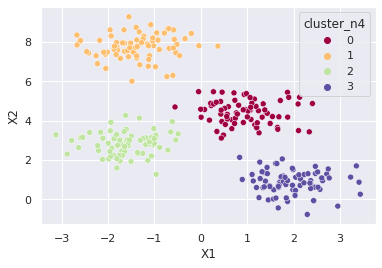

In [20]:
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster_n4", palette="Spectral")


In [21]:
# Back in 10m!

# Analyzing Real-World Data

## 2-D Clustering using USA Census Data

In [22]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/acs2017_census_tract_data.csv'
tb_census = pd.read_csv(url, index_col=0)
tb_census = tb_census.dropna()


In [23]:
tb_census.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


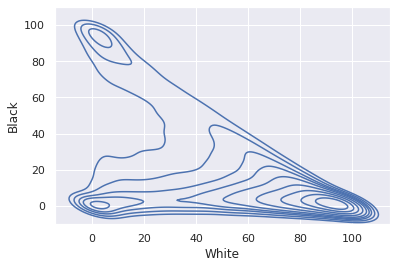

In [24]:
sns.kdeplot(data=tb_census, x="White", y="Black", fill = True)


In [25]:
km_fit_census = KMeans(n_clusters=3)
km_fit_census.fit(tb_census[["White", "Black"]])
tb_census["racial_cluster"] = km_fit_census.predict(tb_census[["White", "Black"]])


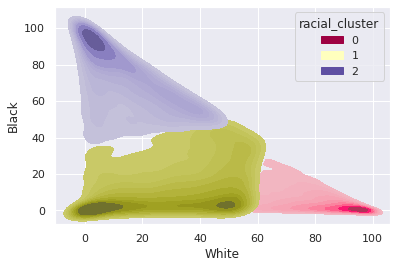

In [26]:
sns.kdeplot(
    data=tb_census,
    x="White",
    y="Black",
    hue="racial_cluster",
    fill=True,
    common_norm=False,
    palette="Spectral",
)


In [27]:
km_fit_census = KMeans(n_clusters=4)
km_fit_census.fit(tb_census[["White", "Black"]])
tb_census["racial_cluster"] = km_fit_census.predict(tb_census[["White", "Black"]])


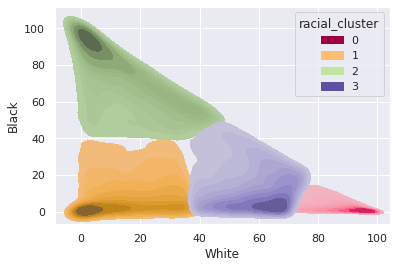

In [28]:
sns.kdeplot(
    data=tb_census,
    x="White",
    y="Black",
    hue="racial_cluster",
    fill=True,
    common_norm=False,
    palette="Spectral",
)


In [29]:
tb_census.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'racial_cluster'],
      dtype='object')

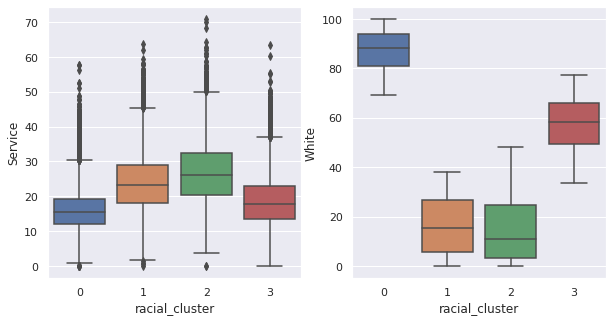

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.boxplot(data = tb_census, x = 'racial_cluster', y = 'Service', ax = ax[0])
sns.boxplot(data = tb_census, x = 'racial_cluster', y = 'White', ax = ax[1])

## Clustering on n-Dimensions

In [36]:
cluster_vars = [
    "IncomePerCap",
    "Poverty",
    "Professional",
    "Service",
    "Office",
    "Construction",
    "Production",
    "OtherTransp",
    "WorkAtHome",
    "MeanCommute",
    "Employed",
    "PrivateWork",
    "PublicWork",
    "SelfEmployed",
]


In [37]:
census_scaler = StandardScaler()
census_scaler.fit(tb_census[cluster_vars])

tb_sca_census = pd.DataFrame(
    census_scaler.transform(tb_census[cluster_vars]), columns=cluster_vars
)
tb_sca_census.head()


,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed
0,0.148406,-0.430197,0.195907,-0.407545,-0.109664,0.258581,-0.068794,-0.758742,-0.666359,-0.222719,-1.071607,-0.667542,0.984056,-0.439011
1,-0.736597,0.511184,-0.336054,0.759397,-0.091779,-0.498509,0.326335,-0.557599,-1.223284,-0.546862,-1.097497,-0.453901,0.118707,0.745612
2,-0.595219,-0.108357,-0.508942,0.069270,1.768249,0.107163,-0.437581,-0.436913,-0.825481,-0.420024,-0.535049,-0.780645,0.970099,-0.360036
3,-0.164015,-1.106060,-0.435797,-0.282067,0.426883,-0.027431,0.866345,0.407887,-0.666359,-0.025415,-0.207400,-0.466468,0.774697,-0.439011
4,0.393735,-0.309507,0.880807,-0.633404,-0.521016,-0.969588,0.062916,-0.638056,-1.037643,-0.715981,2.415575,-1.019420,1.388816,-0.439011


In [38]:
tb_sca_census.describe()

,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed
count,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04
mean,1.563393e-17,-8.911342e-17,-3.861582e-16,-3.314394e-16,-2.251286e-16,-8.833172e-17,2.024594e-16,1.027931e-16,-1.078741e-16,-1.235081e-16,1.876072e-16,-7.504288e-16,2.001143e-16,-1.305433e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.832594e+00,-1.291117e+00,-2.364157e+00,-2.364994e+00,-4.187416e+00,-1.558436e+00,-1.701993e+00,-7.587419e-01,-1.223284e+00,-3.083635e+00,-1.840287e+00,-7.793078e+00,-1.974879e+00,-1.623634e+00
25%,-6.338451e-01,-7.359442e-01,-7.217261e-01,-6.961429e-01,-6.640950e-01,-7.172243e-01,-7.536837e-01,-5.978275e-01,-6.928797e-01,-7.018874e-01,-6.921772e-01,-5.293038e-01,-6.768557e-01,-7.022607e-01
50%,-2.157062e-01,-2.773230e-01,-1.498677e-01,-1.440417e-01,-3.812422e-02,-1.452004e-01,-1.478193e-01,-2.759988e-01,-2.155156e-01,-9.588064e-02,-1.484768e-01,1.367517e-01,-1.604378e-01,-1.757616e-01
75%,3.626824e-01,4.629078e-01,6.148267e-01,5.460847e-01,6.236163e-01,5.445931e-01,6.029256e-01,2.469728e-01,4.474901e-01,5.946852e-01,5.086062e-01,6.897033e-01,4.815952e-01,4.823624e-01
max,1.196580e+01,6.754869e+00,3.766698e+00,6.531363e+00,8.743351e+00,9.898866e+00,6.266440e+00,2.072332e+01,2.073546e+01,6.739311e+00,2.398325e+01,2.574766e+00,9.288613e+00,1.085440e+01


In [39]:
census_pca = PCA(n_components= 4)
census_pca.fit(tb_sca_census)

tb_pca_census = pd.DataFrame(
    census_pca.transform(tb_sca_census),
    columns=["PC" + str(i) for i in range(census_pca.n_components_)],
)


In [47]:
np.cumsum(census_pca.explained_variance_ratio_)

array([0.27981238, 0.42677954, 0.52910678, 0.62121169])

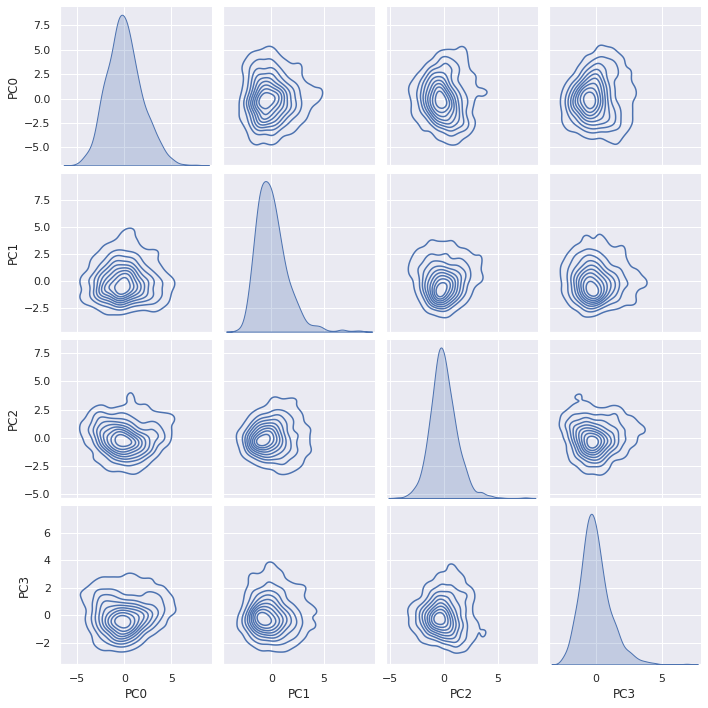

In [40]:
sns.pairplot(data=tb_pca_census.sample(1000), kind = 'kde')


In [41]:
km_fit_census = KMeans(n_clusters=4)
km_fit_census.fit(tb_sca_census)

tb_census["work_cluster"] = km_fit_census.predict(tb_sca_census[cluster_vars])
tb_pca_census["work_cluster"] = km_fit_census.predict(tb_sca_census[cluster_vars])


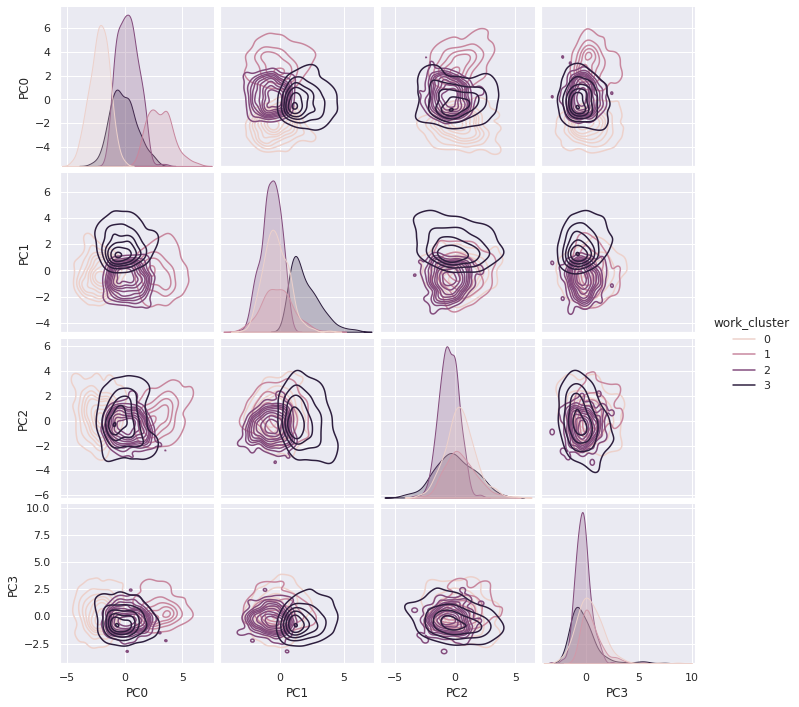

In [42]:
sns.pairplot(data=tb_pca_census.sample(1000), hue="work_cluster", kind="kde")


#### Analyzing Cluster Results

In [43]:
tb_census.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'racial_cluster',
       'work_cluster'],
      dtype='object')

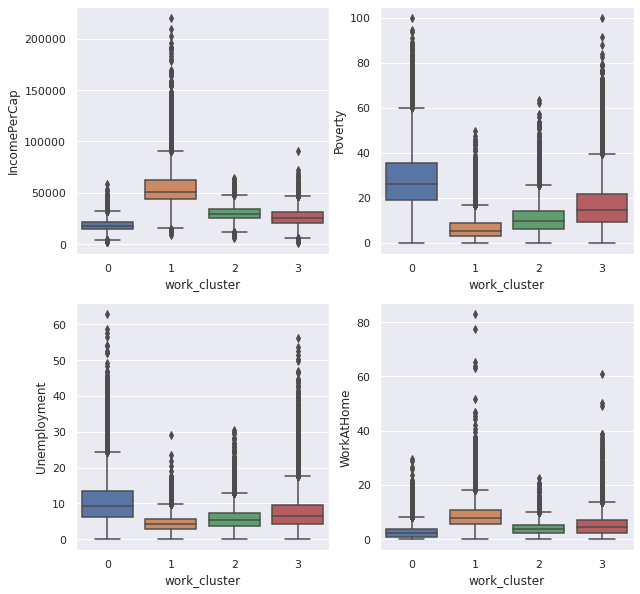

In [44]:
fig, ax = plt.subplots(2,2, figsize = (10, 10))
sns.boxplot(data = tb_census, x = 'work_cluster', y = 'IncomePerCap', ax = ax[0][0])
sns.boxplot(data = tb_census, x = 'work_cluster', y = 'Poverty', ax = ax[0][1])
sns.boxplot(data = tb_census, x = 'work_cluster', y = 'Unemployment', ax = ax[1][0])
sns.boxplot(data = tb_census, x = 'work_cluster', y = 'WorkAtHome', ax = ax[1][1])

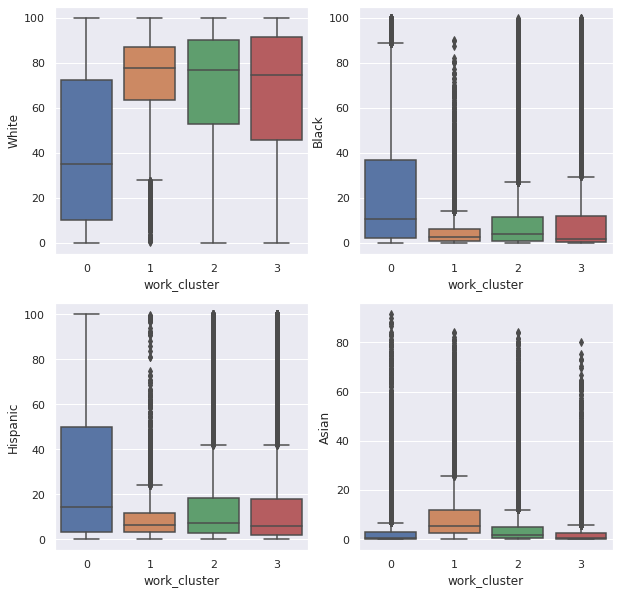

In [45]:
fig, ax = plt.subplots(2,2, figsize = (10, 10))
sns.boxplot(data = tb_census, x = 'work_cluster', y = 'White', ax = ax[0][0])
sns.boxplot(data = tb_census, x = 'work_cluster', y = 'Black', ax = ax[0][1])
sns.boxplot(data = tb_census, x = 'work_cluster', y = 'Hispanic', ax = ax[1][0])
sns.boxplot(data = tb_census, x = 'work_cluster', y = 'Asian', ax = ax[1][1])